**Loading and Pre-processing Data**

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load the Iris dataset from scikit-learn
data = load_iris()

# Create a DataFrame to work with the data
df = pd.DataFrame(data.data, columns=data.feature_names)

In [3]:
# Select only two features for modeling (petal length and petal width)
selected_features = df[['petal length (cm)', 'petal width (cm)']]

# Extract the target labels (species) from the dataset
labels = data.target

**KNN Implementation**

In [4]:
# Import the necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
# Initialize the range of k values
k_values = range(1, 11)

# Initialize lists to store accuracy and train-test split results
accuracy_scores = []
train_test_scores = []

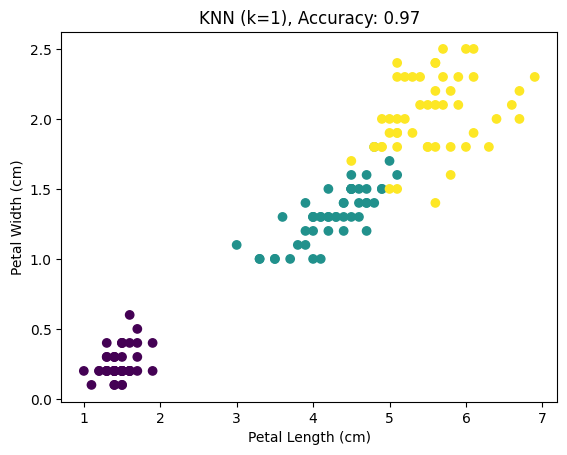

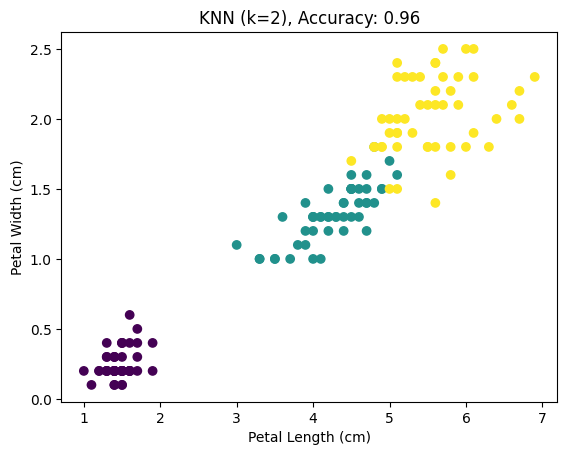

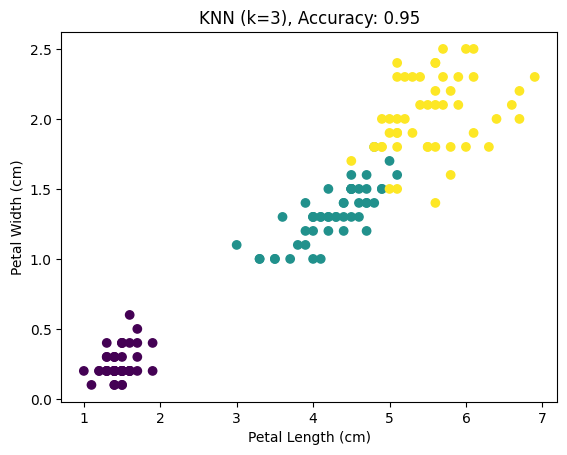

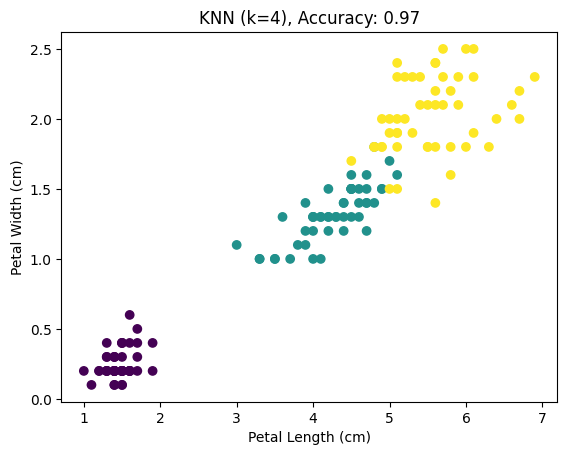

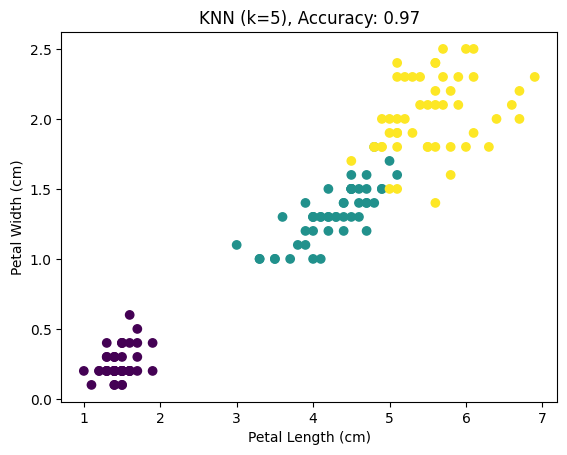

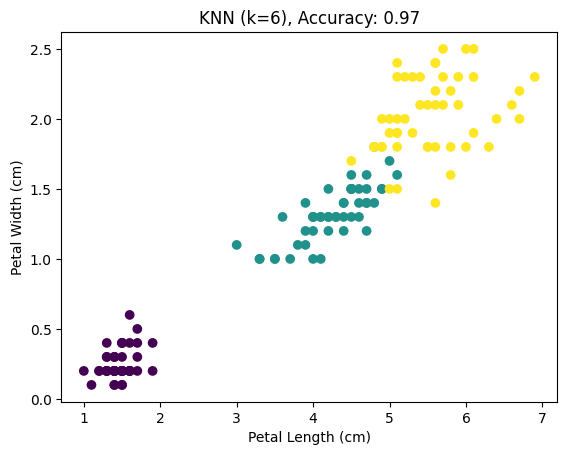

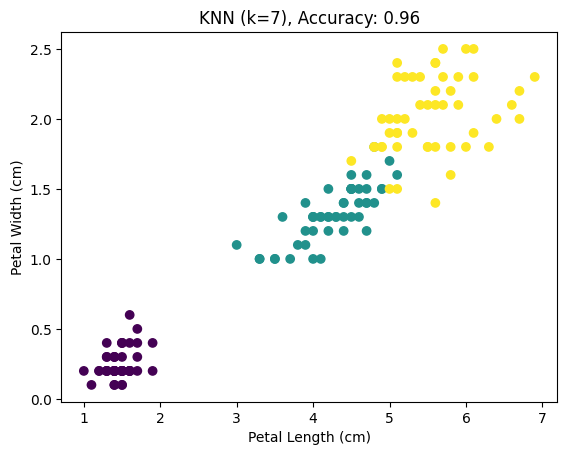

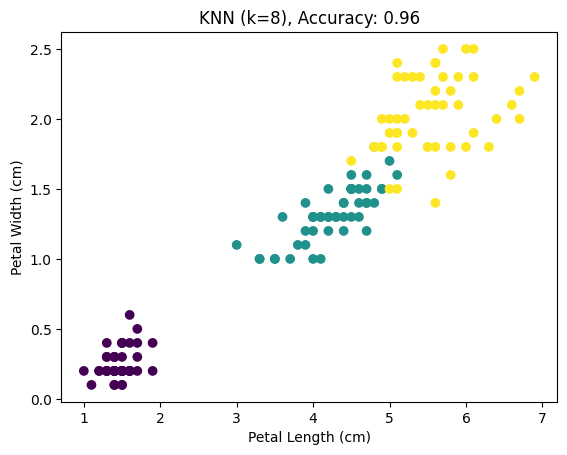

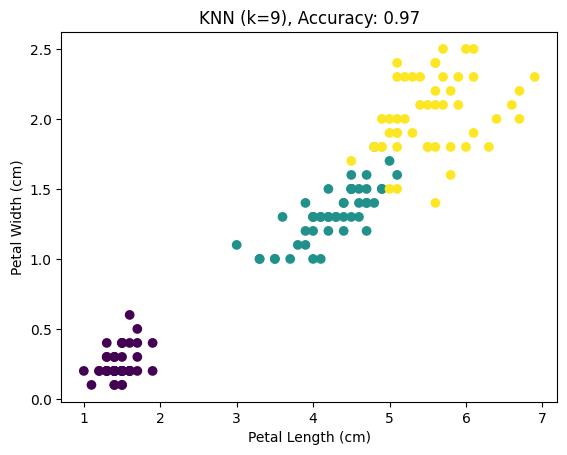

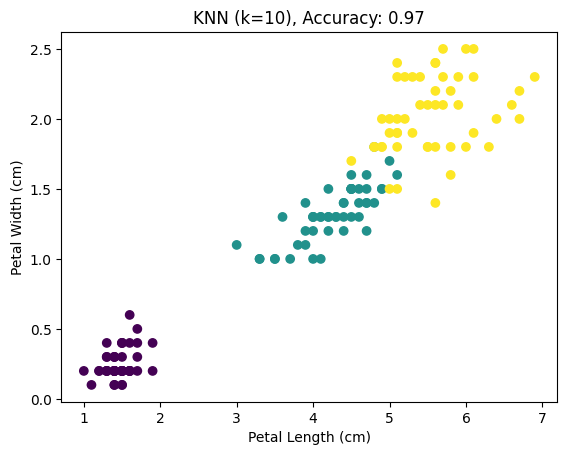

In [6]:
# Create scatter plots and calculate accuracy for each k
for k in k_values:
    # Initialize the KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Calculate accuracy using k-fold cross-validation (k=5)
    accuracy = cross_val_score(knn, selected_features, labels, cv=5, scoring='accuracy').mean()
    accuracy_scores.append(accuracy)

    # Split the data into a train-test split
    X_train, X_test, y_train, y_test = train_test_split(selected_features, labels, test_size=0.3, random_state=42)

    # Fit the KNN model and evaluate on the test set
    knn.fit(X_train, y_train)
    train_test_accuracy = knn.score(X_test, y_test)
    train_test_scores.append(train_test_accuracy)

    # Create scatter plot of petal length vs. petal width for this k value
    plt.figure()
    plt.scatter(selected_features['petal length (cm)'], selected_features['petal width (cm)'], c=labels, cmap='viridis')
    plt.title(f'KNN (k={k}), Accuracy: {accuracy:.2f}')
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.show()

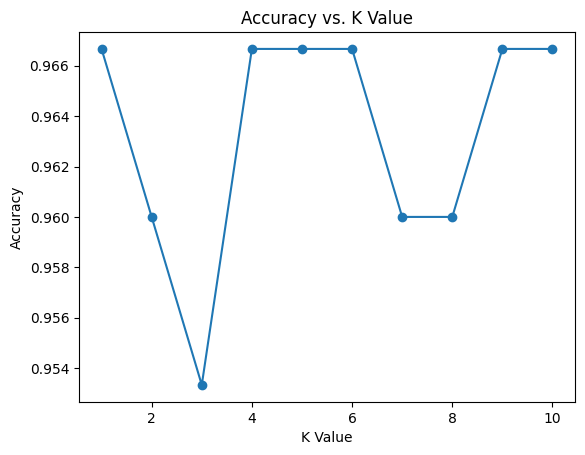

In [7]:
# Plot a graph of accuracy against each k value
plt.figure()
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

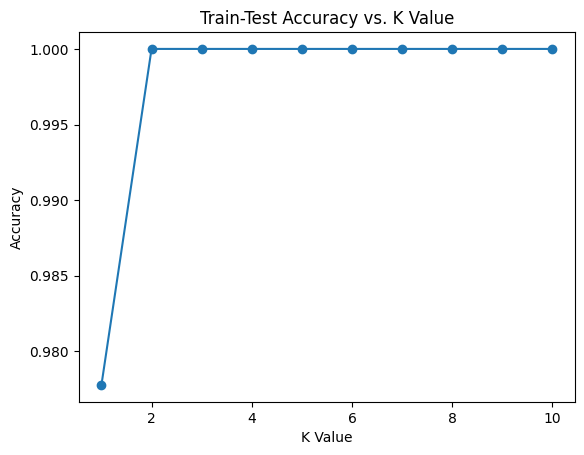

In [8]:
# Plot a graph of train-test accuracy against each k value
plt.figure()
plt.plot(k_values, train_test_scores, marker='o')
plt.title('Train-Test Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

**Choosing Optimal Value of K using Elbow Method**

In [9]:

import matplotlib.pyplot as plt

# Initialize an empty list to store the error values
error_values = []


In [10]:
# Calculate the error for each k value
for k in k_values:
    # Initialize the KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    # Calculate the negative mean squared error (a common choice for error)
    neg_mse = -cross_val_score(knn, selected_features, labels, cv=5, scoring='neg_mean_squared_error').mean()
    error_values.append(neg_mse)

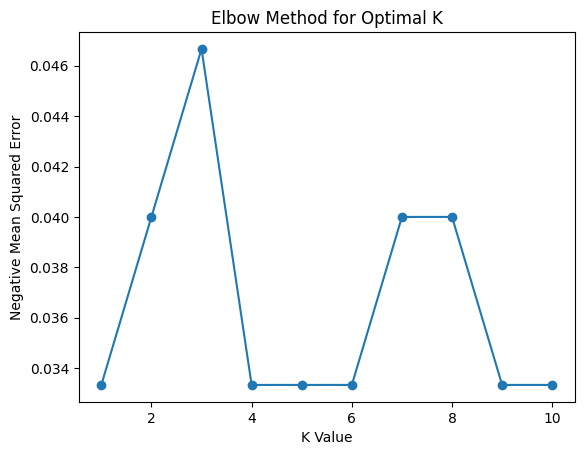

In [11]:
# Plot the objective function (error) against different values of k
plt.figure()
plt.plot(k_values, error_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('K Value')
plt.ylabel('Negative Mean Squared Error')
plt.show()

In [12]:
# Identify the optimal value of k based on the elbow method
optimal_k = k_values[error_values.index(min(error_values))]
print(f'The optimal value of k is {optimal_k}')

The optimal value of k is 4
